In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set_theme(color_codes=True)

In [2]:
url = "data"
url1 = "E:/"

data = pd.read_csv("E:/DataSets/president_heights.csv", index_col=False)

data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order       42 non-null     int64 
 1   name        42 non-null     object
 2   height(cm)  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [4]:
data.select_dtypes(include='object').nunique()


name    42
dtype: int64

In [5]:
data.describe()

,order,height(cm)
count,42.000000,42.000000
mean,22.476190,179.738095
std,13.152461,7.015869
min,1.000000,163.000000
25%,11.250000,174.250000
50%,22.000000,182.000000
75%,33.750000,183.000000
max,44.000000,193.000000


In [6]:
data[data['height(cm)']==data['height(cm)'].max()]

,order,name,height(cm)
15,16,Abraham Lincoln,193
33,36,Lyndon B. Johnson,193


In [7]:
print("Mean Height is ", data['height(cm)'].mean())
data.loc[data['height(cm)']>=data['height(cm)'].mean(),['name','height(cm)']].sort_values(['height(cm)'],ascending=[True])

Mean Height is  179.73809523809524


,name,height(cm)
25,Woodrow Wilson,180
24,William Howard Taft,182
28,Herbert Hoover,182
34,Richard Nixon,182
40,George W. Bush,182
19,James A. Garfield,183
20,Chester A. Arthur,183
4,James Monroe,183
26,Warren G. Harding,183
32,John F. Kennedy,183


In [8]:
heights=data['height(cm)']
print("Mean height: ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height: ", heights.min())
print("Maximum height: ", heights.max())

Mean height:  179.73809523809524
Standard deviation: 7.0158688553582955
Minimum height:  163
Maximum height:  193


In [9]:
print("25th percentile: ", np.percentile(heights, 25))
print("Median: ", np.median(heights))
print("75th percentile: ", np.percentile(heights, 75))

25th percentile:  174.25
Median:  182.0
75th percentile:  183.0


In [11]:
#Group the presidents by their heights
height_group = data.groupby('height(cm)')
height_counts = height_group.count()
print("President Height (cm) and Number")
print(height_counts)

President Height (cm) and Number
            order  name
height(cm)             
163             1     1
168             2     2
170             2     2
171             1     1
173             4     4
174             1     1
175             2     2
177             1     1
178             4     4
179             1     1
180             1     1
182             4     4
183             8     8
185             3     3
188             3     3
189             2     2
193             2     2


<Figure size 1000x1000 with 0 Axes>

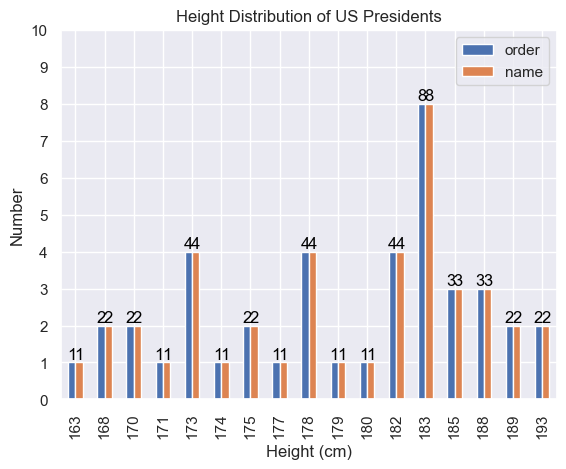

In [12]:
plt.figure(figsize=(10,10))
bar_plot = height_counts.sort_values(by='height(cm)',ascending=True).plot(kind='bar', legend=True,title="Height Distribution of US Presidents")
for c in bar_plot.containers:
    bar_plot.bar_label(c, label_type='edge',color='black')
    
plt.yticks(np.arange(0, 11, step=1))

plt.xlabel ('Height (cm)', fontsize=12)

plt.ylabel ('Number', fontsize=12)
plt.savefig('E://US-Presidents-Height-Order-graph.png', bbox_inches='tight',dpi=300)

plt.show()

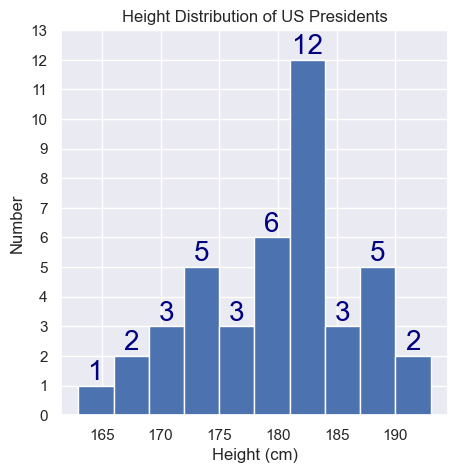

In [14]:
# Plot a histogram for Height Distribution of US Presidents
# Define the size of the graph
plt.figure(figsize=(5,5))
# Visual representation of this data
# To extract any information (For example. heights)
heights = np.array(data['height(cm)'])
values, bins, bars = plt.hist(heights, edgecolor='white')
#plt.hist(heights, edgecolor='white')
plt.title('Height Distribution of US Presidents')
#plt.xlabel('height (cm)')
#plt.ylabel('number');
plt.bar_label(bars, fontsize=20, color='navy')
# Define x-axis range
plt.yticks(np.arange(0, 14, step=1))
# Define x-axis and y-axis labels
plt.xlabel ('Height (cm)', fontsize=12)
plt.ylabel ('Number', fontsize=12)
# save the graph into the file
plt.savefig('E://US-Presidents-Height-Order-graph1.png', bbox_inches='tight',dpi=300)
# show plot
plt.show()

Text(0, 0.5, 'Number of Presidents')

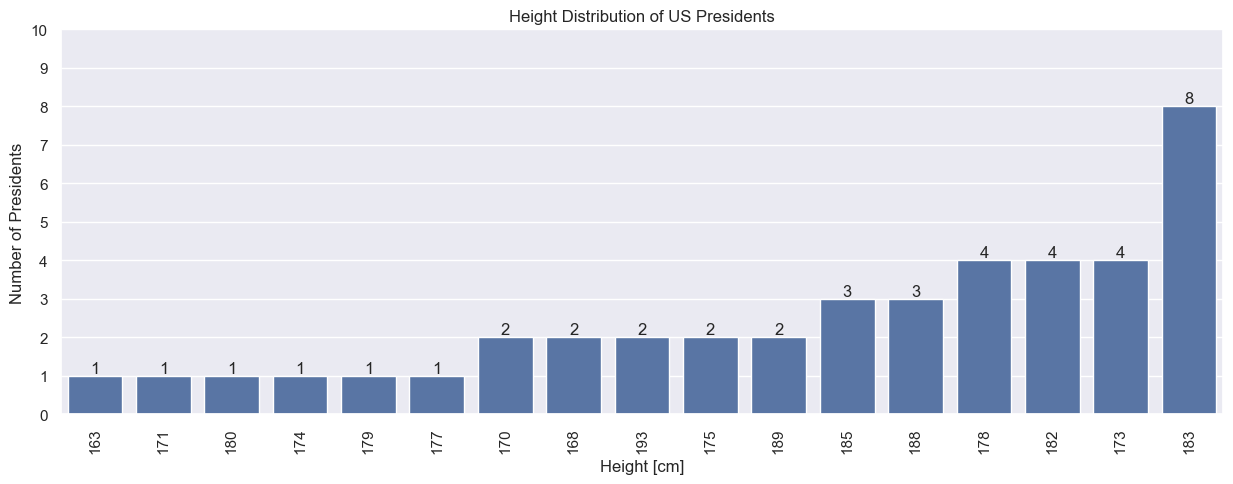

In [15]:
# Plot a bar graph using countplot for Height Distribution of US Presidents
# (Number of Presidents based on the height in ascending order)
plt.figure(figsize=(15, 5))
#heights = data['height(cm)'].value_counts().index
heights = data['height(cm)'].value_counts(ascending=True).index
ax = sns.countplot(data=data, x='height(cm)', order=heights)
abs_values = data['height(cm)'].value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.xticks(rotation=90)
# Define x-axis range
plt.yticks(np.arange(0, 11, step=1))
plt.title("Height Distribution of US Presidents")
plt.xlabel("Height [cm]")
plt.ylabel("Number of Presidents")

    height(cm)  count
0          193      2
1          189      2
2          188      3
3          185      3
4          183      8
5          182      4
6          180      1
7          179      1
8          178      4
9          177      1
10         175      2
11         174      1
12         173      4
13         171      1
14         170      2
15         168      2
16         163      1


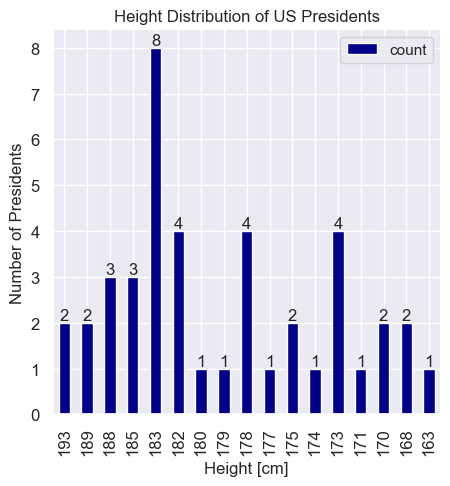

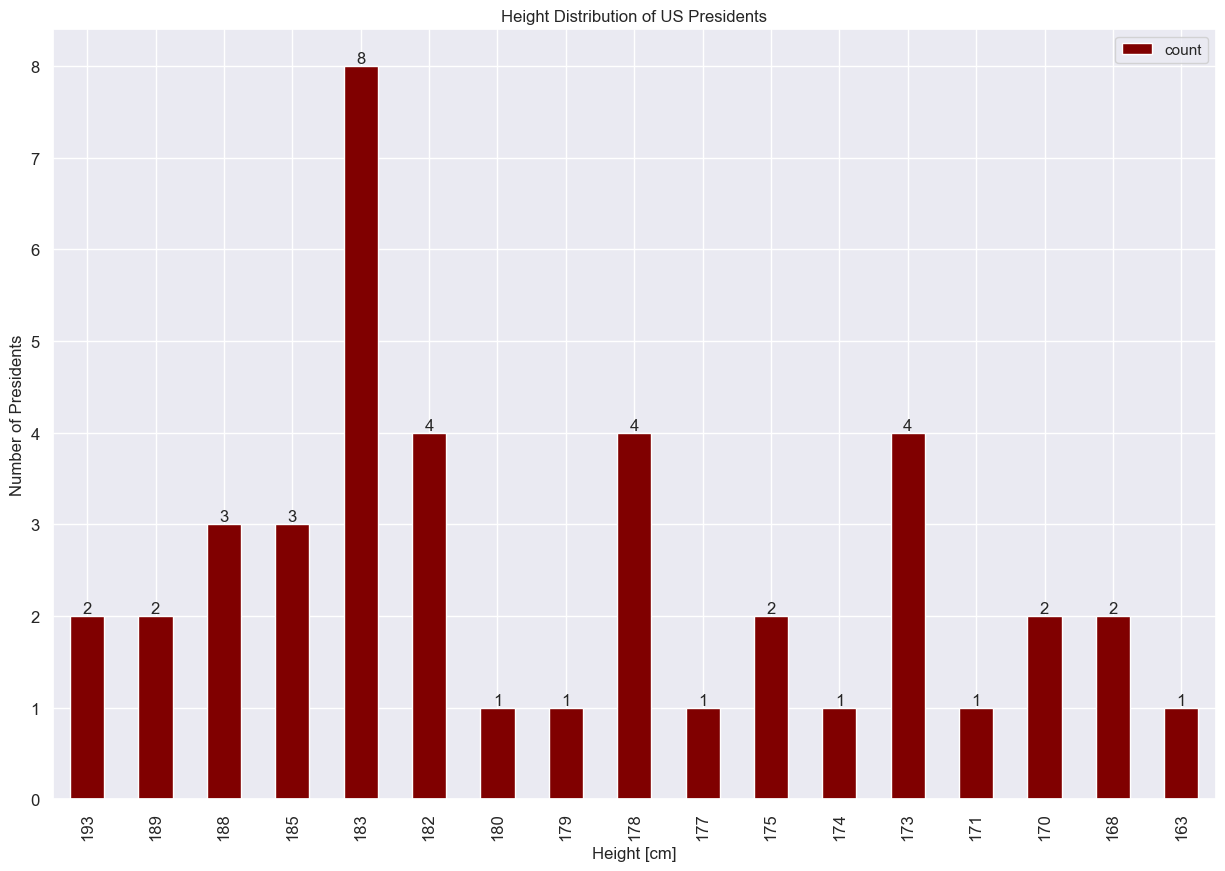

In [61]:
#Group and sort the heights of the presidents
sorted_data = data.groupby('height(cm)').count().sort_values(by=['height(cm)'],ascending=False)
#print(sorted_data)
s1=pd.Series(sorted_data.index.values.tolist(),name='height(cm)')
s2=pd.Series(sorted_data['order'].values.tolist(),name='count')
df = pd.concat([s1,s2], axis=1)
print(df)
# create bar graph
ax = df.plot.bar(x = 'height(cm)', y = 'count', color ='darkblue', figsize =(5, 5), legend=True, fontsize=12)
ax.bar_label(ax.containers[0])
plt.xlabel("Height [cm]")
plt.ylabel("Number of Presidents")
plt.title("Height Distribution of US Presidents")
plt.show()

s1=pd.Series(sorted_data.index.values.tolist(),name='height(cm)')
s2=pd.Series(sorted_data['order'].values.tolist(),name='count')
df = pd.concat([s1,s2], axis=1)
ax = df[['height(cm)','count']].plot(kind='bar', x = 'height(cm)', y = 'count',title="Height Distribution of US Presidents", color ='maroon', figsize=(15,10), legend=True, fontsize=12)
ax.set_xlabel("Height [cm]", fontsize=12)
ax.set_ylabel("Number of Presidents", fontsize=12)
ax.bar_label(ax.containers[0])
plt.show()

    height(cm)  count
0          193      2
1          189      2
2          188      3
3          185      3
4          183      8
5          182      4
6          180      1
7          179      1
8          178      4
9          177      1
10         175      2
11         174      1
12         173      4
13         171      1
14         170      2
15         168      2
16         163      1


<Figure size 1600x1000 with 0 Axes>

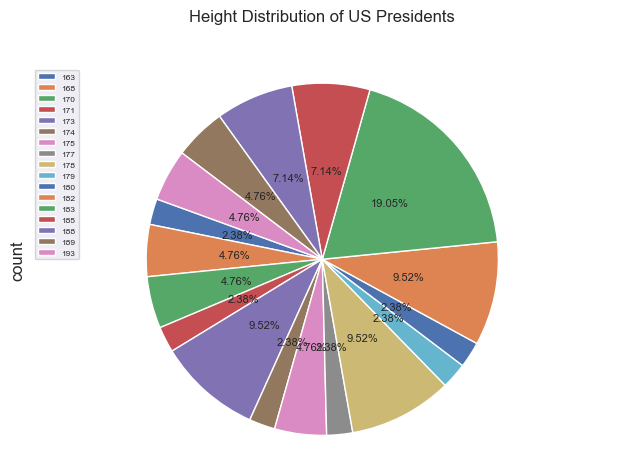

In [19]:
plt.figure(figsize=(16, 10))
#Group and sort the heights of the presidents
sorted_data = data.groupby('height(cm)').count().sort_values(by=['height(cm)'],ascending=False)
#print(sorted_data)
s1=pd.Series(sorted_data.index.values.tolist(),name='height(cm)')
s2=pd.Series(sorted_data['order'].values.tolist(),name='count')
df = pd.concat([s1,s2], axis=1)
print(df)
# Plotting the pie chart for above dataframe
#df.groupby(['height(cm)']).sum().plot(kind='pie', y='count', title="Height Distribution of US Presidents", autopct='%1.0f%%', startangle=90,shadow=True, radius=3)
#df.groupby(['height(cm)']).sum().plot(kind='pie', y='count', title="Height Distribution of US Presidents", autopct='%1.2f%%', startangle=180,shadow=False, radius=3, rotatelabels=True)
df.groupby(['height(cm)']).sum().plot(kind='pie', y='count', autopct='%1.2f%%',startangle=160,shadow=False, radius=3,rotatelabels=True,
pctdistance=0.5, textprops={'fontsize':8}, labeldistance=None)
plt.legend(loc="upper left", prop={'size': 6})
plt.title('Height Distribution of US Presidents', pad=32)
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.show()

In [24]:
# Convert entire data frame as string and print
print(data.to_string())

    order                    name  height(cm)
0       1       George Washington         189
1       2              John Adams         170
2       3        Thomas Jefferson         189
3       4           James Madison         163
4       5            James Monroe         183
5       6       John Quincy Adams         171
6       7          Andrew Jackson         185
7       8        Martin Van Buren         168
8       9  William Henry Harrison         173
9      10              John Tyler         183
10     11           James K. Polk         173
11     12          Zachary Taylor         173
12     13        Millard Fillmore         175
13     14         Franklin Pierce         178
14     15          James Buchanan         183
15     16         Abraham Lincoln         193
16     17          Andrew Johnson         178
17     18        Ulysses S. Grant         173
18     19     Rutherford B. Hayes         174
19     20       James A. Garfield         183
20     21       Chester A. Arthur 

In [25]:
# printing data frame
print(data)

    order                    name  height(cm)
0       1       George Washington         189
1       2              John Adams         170
2       3        Thomas Jefferson         189
3       4           James Madison         163
4       5            James Monroe         183
5       6       John Quincy Adams         171
6       7          Andrew Jackson         185
7       8        Martin Van Buren         168
8       9  William Henry Harrison         173
9      10              John Tyler         183
10     11           James K. Polk         173
11     12          Zachary Taylor         173
12     13        Millard Fillmore         175
13     14         Franklin Pierce         178
14     15          James Buchanan         183
15     16         Abraham Lincoln         193
16     17          Andrew Johnson         178
17     18        Ulysses S. Grant         173
18     19     Rutherford B. Hayes         174
19     20       James A. Garfield         183
20     21       Chester A. Arthur 

In [26]:
print(data['height(cm)'].to_string(index=False))

189
170
189
163
183
171
185
168
173
183
173
173
175
178
183
193
178
173
174
183
183
168
170
178
182
180
183
178
182
188
175
179
183
193
182
183
177
185
188
188
182
185
